## Появилась идея открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

## План:
1. Подготовка к анализу 
2. Анализ данных:
  - Исследуем соотношение видов объектов общественного питания по количеству;
  - Исследуем количество сетевых и несетевых заведений;
  - Посмотрим, для какого вида характерно сетевое распространение;
  - Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?;
  - Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?;
  - Выделим в отдельный столбец информацию об улице из столбца address;
  - Построим график топ-10 улиц по количеству объектов общественного питания. Узнаем, в каких районах Москвы находятся эти улицы;
  - Найдем число улиц с одним объектом общественного питания. Ответим на вопрос — в каких районах Москвы находятся эти улицы?;
  - Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности;
3. Вывод

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# 1. Подготовка данных к анализу <a id="start"></a>

In [2]:
rest_data = pd.read_csv('/Users/kirillanosov/Downloads/rest_data.csv')
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Посмотрим, есть ли дубликаты:

In [4]:
rest_data.duplicated().sum()


0

In [5]:
rest_data['object_name'].duplicated().sum()

4973

Очевидно, что дубликаты в названиях заведений это просто названия сетевых точек. Пока эти дубликаты убирать не будем

In [6]:
rest_data['address'].duplicated().sum()

6258

Возможно, что в одном здании находится несколько разных заведений. Поэтому убирать эти дубликаты не вижу смысла

Приведем названия заведений к нижнему регистру, чтобы было проще потом с ними работать

In [7]:
rest_data['object_name'] = rest_data['object_name'].str.lower()

В данных есть дубликаты в столбцах с названиями заведений и их адресами. Но эти дубликаты мы не будем трогать, так как повторяющиеся названия заведений это скорее всего названия сетей, а адреса - в одном доме вполне могут находится несколько разных заведений, это не редкость

# 2. Анализ данных <a id="analysis"></a>

## Исследуем соотношение видов объектов общественного питания по количеству<a id="amount"></a>

In [8]:
rest_data['object_type'].value_counts().reset_index()

,index,object_type
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


In [9]:
rest_data['number_of_object'] = 1
rest_data.head()

,id,object_name,chain,object_type,address,number,number_of_object
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,1
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1


In [10]:
types = rest_data.groupby('object_type').agg({'number_of_object' : 'sum'})
types

,number_of_object
object_type,
бар,856
буфет,585
закусочная,360
кафе,6099
кафетерий,398
магазин (отдел кулинарии),273
предприятие быстрого обслуживания,1923
ресторан,2285
столовая,2587


Text(0, 0.5, 'Количество объектов')

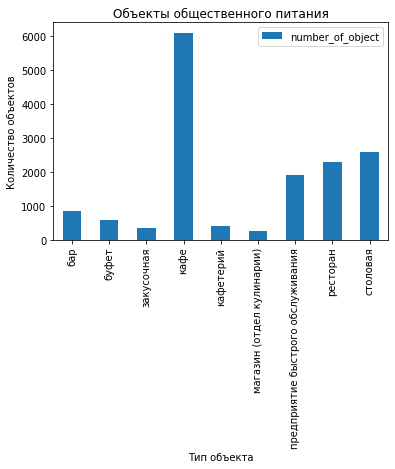

In [11]:
types.plot(kind = 'bar', title = 'Объекты общественного питания')
plt.xlabel('Тип объекта')
plt.ylabel('Количество объектов')


Больше всего **кафе, столовых, ресторанов и предприятий быстрого обслуживания**

## Исследуем количество сетевых и несетевых заведений <a id="net"></a>

In [12]:
net = rest_data.groupby('chain').agg({'number_of_object' : 'sum'})
net

,number_of_object
chain,
да,2968
нет,12398


Text(0, 0.5, 'Количество')

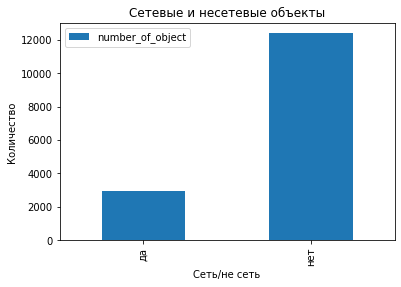

In [13]:
net.plot(kind = 'bar', title = 'Сетевые и несетевые объекты')
plt.xlabel('Сеть/не сеть')
plt.ylabel('Количество')


В основном **несетевые** объекты

## Посмотрим, для какого вида характерно **сетевое распространение**<a id="c_net"></a>

In [14]:
chain_object = rest_data.query('chain == "да"').reset_index()
chain_object

,index,id,object_name,chain,object_type,address,number,number_of_object
0,3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1
1,6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,1
2,13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,1
3,16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,1
4,18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,1
...,...,...,...,...,...,...,...,...
2963,15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,1
2964,15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,1
2965,15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,1
2966,15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,1


In [15]:
chain = chain_object.groupby('object_type').agg({'number_of_object' : 'sum'})
chain

,number_of_object
object_type,
бар,37
буфет,11
закусочная,56
кафе,1396
кафетерий,52
магазин (отдел кулинарии),78
предприятие быстрого обслуживания,791
ресторан,544
столовая,3


In [16]:
types_chain = types.merge(chain, on = 'object_type')
types_chain

,number_of_object_x,number_of_object_y
object_type,,
бар,856,37
буфет,585,11
закусочная,360,56
кафе,6099,1396
кафетерий,398,52
магазин (отдел кулинарии),273,78
предприятие быстрого обслуживания,1923,791
ресторан,2285,544
столовая,2587,3


In [17]:
types_chain['chain%'] = types_chain['number_of_object_y'] /  types_chain['number_of_object_x'] * 100
types_chain['chain%'] = types_chain['chain%'].apply(np.ceil)
types_chain

,number_of_object_x,number_of_object_y,chain%
object_type,,,
бар,856,37,5.0
буфет,585,11,2.0
закусочная,360,56,16.0
кафе,6099,1396,23.0
кафетерий,398,52,14.0
магазин (отдел кулинарии),273,78,29.0
предприятие быстрого обслуживания,1923,791,42.0
ресторан,2285,544,24.0
столовая,2587,3,1.0


Text(0, 0.5, 'Процент сетевых')

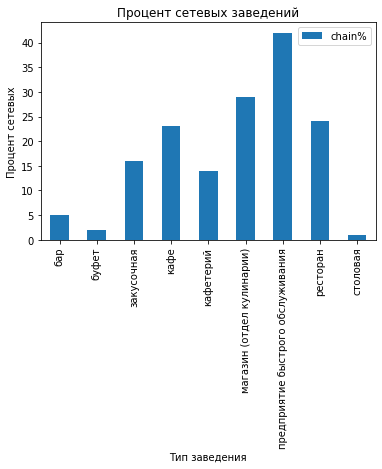

In [18]:
types_chain = types_chain.drop(['number_of_object_x','number_of_object_y'], axis = 1)
types_chain.plot(kind = 'bar', title = 'Процент сетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Процент сетевых')

Наибольшую долю сетевых заведений имеют, коненчо же, **предприятия быстрого обслуживания**. На втором месте кулинарии магазинов - это тоже вполне логично. Столовых в целом много, но сетевых меньше 1%. Это нормально, сетевые столовые не распространены

## Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a id="c_chair"></a>

In [19]:
many_few = chain_object.groupby('object_name').agg({'id' : 'nunique', 'number' : 'mean'})
many_few = many_few.sort_values(by = 'id', ascending = False).head(60)
many_few

,id,number
object_name,,
шоколадница,157,57.184713
kfc,155,55.341935
макдоналдс,151,87.119205
бургер кинг,137,46.649635
теремок,94,25.606383
крошка картошка,90,21.855556
домино'с пицца,90,18.344444
милти,72,1.333333
суши wok,72,6.708333


Text(0.5, 1.0, 'Взаимосвязь количества заведений сети и среднего количества посадочных мест')

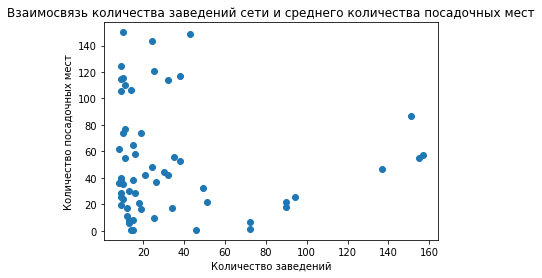

In [20]:
plt.scatter(x = "id", y = "number", data = many_few)
plt.xlabel('Количество заведений')
plt.ylabel('Количество посадочных мест')
plt.title('Взаимосвязь количества заведений сети и среднего количества посадочных мест')

Как мы видим,есть сетевые заведения, где меньше 10 точек, но и мест не более 20. А есть сетевые заведения с малым количесвтом точек, но с большим количествомю Однако в общем, сети с 20 и более заведениями имеют, как правило достаточное количесвто мест. Поэтому никакой особой корреляции между количеством точек и количесвтом посадочных мест нет. Тут скорее надо говорить о специфике той или иной сети

## Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? <a id="m_chair"></a>

In [21]:
chairs = rest_data.groupby('object_type').agg({'number' : 'mean'})
chairs

,number
object_type,
бар,43.494159
буфет,51.129915
закусочная,7.608333
кафе,39.716019
кафетерий,9.123116
магазин (отдел кулинарии),5.589744
предприятие быстрого обслуживания,20.552262
ресторан,96.834136
столовая,130.246618


Построим график для наглядности и сделаем выводы:

[Text(0, 0, 'кафе'),
 Text(0, 0, 'столовая'),
 Text(0, 0, 'закусочная'),
 Text(0, 0, 'предприятие быстрого обслуживания'),
 Text(0, 0, 'ресторан'),
 Text(0, 0, 'кафетерий'),
 Text(0, 0, 'буфет'),
 Text(0, 0, 'бар'),
 Text(0, 0, 'магазин (отдел кулинарии)')]

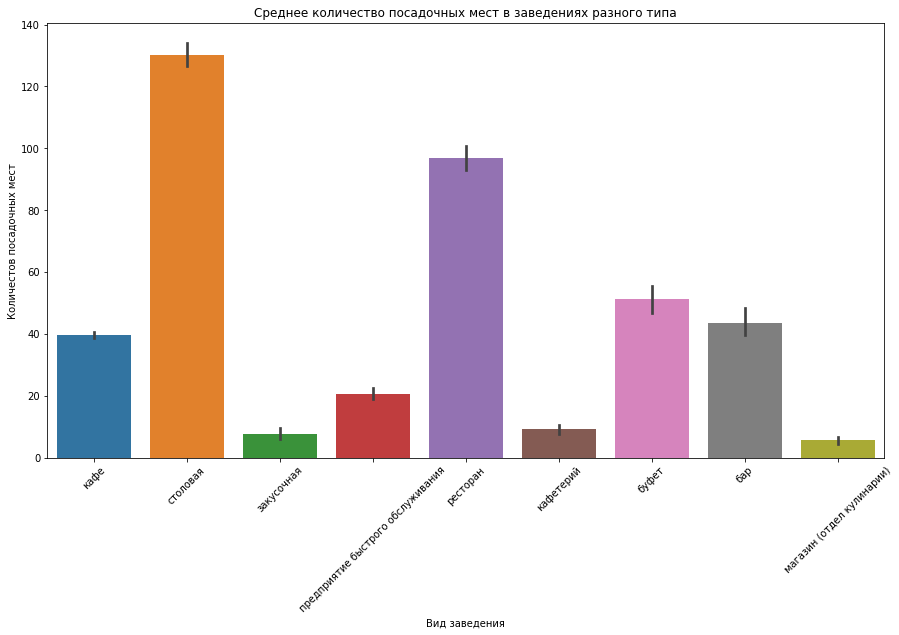

In [22]:
plt.figure(figsize = (15, 8))
bar = sns.barplot(x="object_type", y="number", data = rest_data)
plt.xlabel('Вид заведения')
plt.ylabel('Количестов посадочных мест')
plt.title('Среднее количество посадочных мест в заведениях разного типа')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)

В среднем в **столовых** и **ресторанах** больше всего посадочных мест. В **кафе**, **барах**, **буфетах** тоже достаточно - больше 40 но меньше 60. Вполне подходит форматам этих заведений.



## Выделим в отдельный столбец информацию об улице из столбца address<a id="address"></a>

In [23]:
rest_data[['city', 'street', 'house']] = rest_data['address'].str.split(',', n = 2, expand=True)
rest_data.head(10)

,id,object_name,chain,object_type,address,number,number_of_object,city,street,house
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1,город Москва,улица Егора Абакумова,дом 9
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1,город Москва,улица Талалихина,"дом 2/1, корпус 1"
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,1,город Москва,Абельмановская улица,дом 6
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,город Москва,Абрамцевская улица,дом 1
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1,город Москва,Абрамцевская улица,"дом 9, корпус 1"
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,1,город Москва,Абрамцевская улица,"дом 15, корпус 1"
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,1,город Москва,переулок Сивцев Вражек,дом 6/2
7,20957,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,1,город Москва,Авиамоторная улица,"дом 8, строение 1"
8,20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,1,город Москва,Авиамоторная улица,"дом 8, строение 1"
9,28858,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,1,город Москва,Авиамоторная улица,"дом 8, строение 1"


In [24]:
rest_data = rest_data.drop(['city', 'house'], axis = 1)

In [25]:
rest_data

,id,object_name,chain,object_type,address,number,number_of_object,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,1,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,1,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1,Абрамцевская улица
...,...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,1,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,1,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,1,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,1,поселение Московский


## Построим график топ-10 улиц по количеству объектов общественного питания. Узнаем, в каких районах Москвы находятся эти улицы<a id="top"></a>

In [26]:
streets = rest_data.groupby('street').agg({'number_of_object' : 'sum'}).reset_index()
streets = streets.sort_values(by = 'number_of_object', ascending = False)
streets = streets.query('number_of_object >= 110')
streets

,street,number_of_object
1334,город Зеленоград,232
1452,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1419,поселение Сосенское,138
1449,проспект Вернадского,132
674,Кутузовский проспект,114


[Text(0, 0, ' город Зеленоград'),
 Text(0, 0, ' проспект Мира'),
 Text(0, 0, ' Профсоюзная улица'),
 Text(0, 0, ' Ленинградский проспект'),
 Text(0, 0, ' Пресненская набережная'),
 Text(0, 0, ' Варшавское шоссе'),
 Text(0, 0, ' Ленинский проспект'),
 Text(0, 0, ' поселение Сосенское'),
 Text(0, 0, ' проспект Вернадского'),
 Text(0, 0, ' Кутузовский проспект'),
 Text(0, 0, ' Каширское шоссе'),
 Text(0, 0, ' Кировоградская улица')]

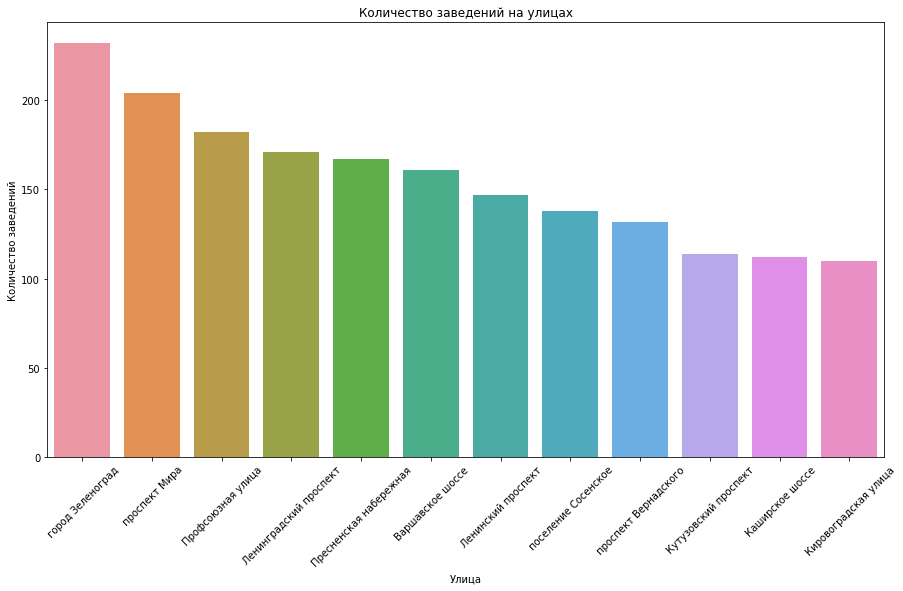

In [27]:
plt.figure(figsize = (15, 8))
bar = sns.barplot(x="street", y="number_of_object", data = streets)
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Количество заведений на улицах')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)

Я сделал срез 12 верхних значений, т.к. Зеленоград и поселение Соснеское это все-таки не улицы, а особые районы Москвы.


Чтобы посмотреть, в каких районах расположены эти улицы, я обратился к внещним источникам (https://yadi.sk/d/uTI-nHe19qJTHQ):

In [28]:
district = pd.read_excel('/Users/kirillanosov/Downloads/data-29580-2020-07-28.xlsx')


Файл большой, с кучей ненужных нам столбцов. Я их очищу в 3 приема

In [29]:
district = district.drop(['OBJ_TYPE', 'OnTerritoryOfMoscow', 'UNOM', 'P3', 'P4', 'P6', 'KLADR'], axis = 1)

In [30]:
district = district.drop(['P90', 'P91', 'L1_TYPE', 'L1_VALUE', 'L2_TYPE', 'L2_VALUE', 'KAD_ZU', 'TDOC', 'NDOC', 'DDOC', 'ADR_TYPE', 'VID', 'SOSTAD'], axis = 1)

In [31]:
district = district.drop(['L3_TYPE', 'L3_VALUE', 'L4_TYPE', 'L4_VALUE', 'L5_TYPE', 'L5_VALUE', 'ADM_AREA', 'NREG', 'DREG', 'N_FIAS', 'D_FIAS', 'KAD_N', 'STATUS', 'global_id', 'geoData', 'P5', 'P7', 'P1'], axis = 1)

In [32]:
district.columns = district.columns.str.lower()

In [33]:
district

,address,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",муниципальный округ Сокол
...,...,...
281995,"город Москва, Западная улица, владение 7/3",муниципальный округ Восточный
281996,"город Москва, Западная улица, владение 7/4",муниципальный округ Восточный
281997,"город Москва, поселение Киевский, посёлок Стан...",внутригородская территория поселение Киевский
281998,"город Москва, поселение Десеновское, квартал №...",внутригородская территория поселение Десеновское


In [34]:
final = rest_data.merge(district, on = 'address')
final.head()

,id,object_name,chain,object_type,address,number,number_of_object,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,1,улица Егора Абакумова,муниципальный округ Ярославский
1,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,1,Абельмановская улица,муниципальный округ Таганский
2,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,Абрамцевская улица,муниципальный округ Лианозово
3,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,1,Абрамцевская улица,муниципальный округ Лианозово
4,199543,"шаурма, выпечка",нет,предприятие быстрого обслуживания,"город Москва, Абрамцевская улица, дом 9, корпус 1",0,1,Абрамцевская улица,муниципальный округ Лианозово


Объединим новый датафрейм с streets, чтобы по данным оттуда сделать срез самых успешных улиц

In [35]:
top = final.merge(streets, on = 'street')
top

,id,object_name,chain,object_type,address,number,number_of_object_x,street,district,number_of_object_y
0,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,1,Варшавское шоссе,муниципальный округ Донской,161
1,204776,кальян бар,нет,бар,"город Москва, Варшавское шоссе, дом 2",24,1,Варшавское шоссе,муниципальный округ Донской,161
2,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,1,Варшавское шоссе,муниципальный округ Донской,161
3,166556,кафе суши wok,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",8,1,Варшавское шоссе,муниципальный округ Донской,161
4,181111,кафе «doner city»,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",1,1,Варшавское шоссе,муниципальный округ Донской,161
...,...,...,...,...,...,...,...,...,...,...
1810,200292,бар «ku рамен-бар»,нет,бар,"город Москва, Пресненская набережная, дом 10, ...",80,1,Пресненская набережная,муниципальный округ Пресненский,167
1811,199206,кафе «гутай»,нет,кафе,"город Москва, Пресненская набережная, дом 10, ...",27,1,Пресненская набережная,муниципальный округ Пресненский,167
1812,222871,touch of matcha,нет,ресторан,"город Москва, Пресненская набережная, дом 10, ...",40,1,Пресненская набережная,муниципальный округ Пресненский,167
1813,222486,кафе «мпл»,нет,кафе,"город Москва, Пресненская набережная, дом 10, ...",35,1,Пресненская набережная,муниципальный округ Пресненский,167


In [36]:
top_ten = top.query('number_of_object_y >= 110')
top_ten.head(20)

,id,object_name,chain,object_type,address,number,number_of_object_x,street,district,number_of_object_y
0,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,1,Варшавское шоссе,муниципальный округ Донской,161
1,204776,кальян бар,нет,бар,"город Москва, Варшавское шоссе, дом 2",24,1,Варшавское шоссе,муниципальный округ Донской,161
2,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,1,Варшавское шоссе,муниципальный округ Донской,161
3,166556,кафе суши wok,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",8,1,Варшавское шоссе,муниципальный округ Донской,161
4,181111,кафе «doner city»,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 7, корпус 1",1,1,Варшавское шоссе,муниципальный округ Донской,161
5,181112,coffee & talk,нет,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",2,1,Варшавское шоссе,муниципальный округ Донской,161
6,181844,кафе мангал,нет,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",40,1,Варшавское шоссе,муниципальный округ Донской,161
7,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,1,Варшавское шоссе,муниципальный округ Донской,161
8,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,1,Варшавское шоссе,муниципальный округ Нагорный,161
9,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,1,Варшавское шоссе,муниципальный округ Нагорный,161


In [37]:
street = top_ten.groupby(['street', 'district']).agg({'number_of_object_x' : 'sum'}).reset_index().sort_values(by = 'number_of_object_x', ascending = False)
street

,street,district,number_of_object_x
28,Пресненская набережная,муниципальный округ Пресненский,167
40,поселение Сосенское,внутригородская территория поселение Сосенское,121
12,Кировоградская улица,муниципальный округ Чертаново Центральное,79
45,проспект Вернадского,муниципальный округ Тропарево-Никулино,69
16,Ленинградский проспект,муниципальный округ Аэропорт,65
47,проспект Мира,муниципальный округ Мещанский,63
50,проспект Мира,муниципальный округ Свиблово,62
14,Кутузовский проспект,муниципальный округ Дорогомилово,61
36,город Зеленоград,муниципальный округ Крюково,55
15,Кутузовский проспект,муниципальный округ Фили-Давыдково,53


Очевидно выделяются **муниципальный округ Пресненский**, **муниципальный округ Чертаново Центральное**, **муниципальный округ Тропарево-Никулино**, **муниципальный округ Аэропорт**. А также проспекты, прохоядщие через несколько округов сразу: **проспект Мира**, **Ленинский проспект**, **Кутузовский проспект**, **Каширское и Варшавское шоссе**. Такое положение дел наталкивает на мысль, что, возможно, нам не так уж и нужно фокусироваться на этих районах.	

## Найдем число улиц с одним объектом общественного питания. Ответим на вопрос — в каких районах Москвы находятся эти улицы?<a id="dist"></a>

In [38]:
min_street = final.groupby(['street', 'district']).agg({'number_of_object' : 'sum'}).reset_index().sort_values(by = 'number_of_object', ascending = True)
min_street = min_street.query('number_of_object == 1')
min_street.head(20)

,street,district,number_of_object
1027,Парусный проезд,муниципальный округ Южное Тушино,1
1502,поселение Филимонковское,внутригородская территория поселение Филимонко...,1
609,Зелёный проспект,муниципальный округ Ивановское,1
615,Зубарев переулок,муниципальный округ Алексеевский,1
618,Зюзинская улица,муниципальный округ Черемушки,1
1484,площадь Журавлёва,муниципальный округ Соколиная Гора,1
620,Иваньковское шоссе,муниципальный округ Покровское-Стрешнево,1
623,Ижорский проезд,муниципальный округ Дмитровский,1
624,Изваринская улица,муниципальный округ Внуково,1
625,Известковый переулок,муниципальный округ Таганский,1


Улиц с одним заведением у нас много - более 600

In [39]:
min_street['district'].value_counts().head(20)

муниципальный округ Таганский           29
муниципальный округ Хамовники           27
муниципальный округ Басманный           27
муниципальный округ Тверской            23
муниципальный округ Пресненский         21
муниципальный округ Марьина Роща        18
муниципальный округ Сокольники          15
муниципальный округ Арбат               14
муниципальный округ Лефортово           13
муниципальный округ Соколиная Гора      12
муниципальный округ Богородское         12
муниципальный округ Даниловский         12
муниципальный округ Мещанский           12
муниципальный округ Замоскворечье       12
муниципальный округ Красносельский      12
муниципальный округ Якиманка            10
муниципальный округ Южное Бутово        10
муниципальный округ Лосиноостровский     9
муниципальный округ Можайский            9
муниципальный округ Люблино              9
Name: district, dtype: int64

In [40]:
min_street['street'].value_counts().head(20)

 Староконюшенный переулок           2
 улица Академика Скрябина           2
 Аминьевское шоссе                  2
 улица Госпитальный Вал             2
 Волгоградский проспект             2
 Спартаковская площадь              2
 Осташковская улица                 2
 улица Коминтерна                   2
 улица Нижние Поля                  2
 Мартеновская улица                 2
 улица Воронцово Поле               2
 Олонецкая улица                    2
 Севастопольский проспект           2
 Архангельский переулок             1
 Малый Николопесковский переулок    1
 4-й Рощинский проезд               1
 6-я улица Новые Сады               1
 Врачебный проезд                   1
 Подколокольный переулок            1
 Попов проезд                       1
Name: street, dtype: int64

Казалось бы, что такого быть не может, ведь у нас условие, чтобы 1 заведение на улице. Но из-за того, что такие улицы как Воронцово поле прохояд в 2 муницпальных округах, то они продублировались. Таких улиц немного - 13. Поэтому нас будут интересовать именно районы. Больше всего районов с улицами, где только 1 заведение - это центральные округа! Хамовники, Таганский округ, Басманный, Тверской, Пресненский. Возможно дело в высокой аренде, которую могут себе позволить не все, а для кого-то это с точки зрения денег не имеет смысла.

## Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности<a id="c"></a>

In [41]:
top_chairs = top_ten.groupby('street').agg({'number_of_object_x' : 'sum', 'number' : 'mean'}).sort_values(by = 'number_of_object_x', ascending = False).reset_index()
top_chairs

,street,number_of_object_x,number
0,проспект Мира,204,62.696078
1,город Зеленоград,198,76.626263
2,Профсоюзная улица,181,46.535912
3,Ленинградский проспект,171,52.690058
4,Пресненская набережная,167,45.844311
5,Варшавское шоссе,160,52.956250
6,Ленинский проспект,146,63.219178
7,проспект Вернадского,132,66.969697
8,поселение Сосенское,121,20.900826
9,Кутузовский проспект,114,85.061404


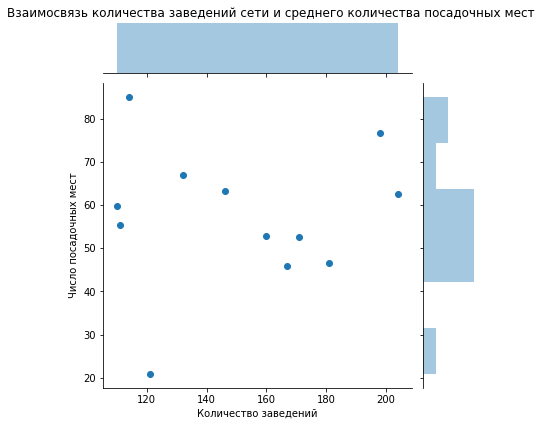

In [42]:
g = sns.jointplot(x = "number_of_object_x", y = "number", data = top_chairs)
g.set_axis_labels('Количество заведений', 'Число посадочных мест')
g.fig.suptitle('Взаимосвязь количества заведений сети и среднего количества посадочных мест')
g.fig.subplots_adjust(top=0.95)


Посмторим то же самое, но не на фильтровоной информации

In [43]:
f_chairs = final.groupby('street').agg({'number_of_object' : 'sum', 'number' : 'mean'}).sort_values(by = 'number_of_object', ascending = False).reset_index()
f_chairs


,street,number_of_object,number
0,проспект Мира,204,62.696078
1,город Зеленоград,198,76.626263
2,Профсоюзная улица,181,46.535912
3,Ленинградский проспект,171,52.690058
4,Пресненская набережная,167,45.844311
...,...,...,...
1772,Староалексеевская улица,1,200.000000
1773,Стандартная улица,1,60.000000
1774,Гродненская улица,1,150.000000
1775,улица Алексея Дикого,1,150.000000


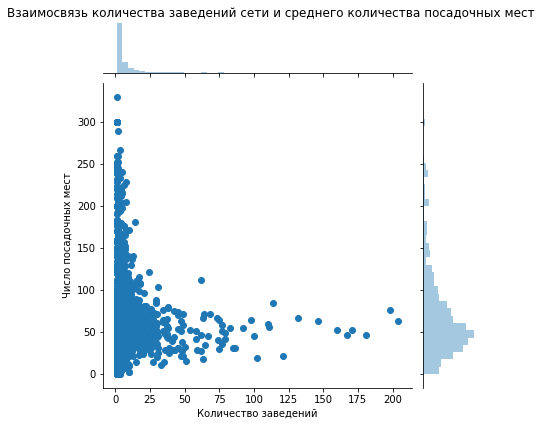

In [44]:
g_f = sns.jointplot(x = "number_of_object", y = "number", data = f_chairs)
g_f.set_axis_labels('Количество заведений', 'Число посадочных мест')
g_f.fig.suptitle('Взаимосвязь количества заведений сети и среднего количества посадочных мест')
g_f.fig.subplots_adjust(top=0.95)

Тут уже видна закономерность: чем меньше заведений на улице, тем больше посадочных мест. При этом нельзя сказать, что на улицах с большим количесвом заведений мало мест - в среднем более 50. 

# Вывод:<a id="conclusion"></a>

Итак, мы посмотрели на положение дел на рынке заведений общественного питания в Москве. Больше всего в Москве именно кафе, сетевых из них только 23%. Но не думаю, что формат заведения будет играть решающую роль. Так как собираемся открыть небольшое кафе, то оптимально будет сделать 40 посадочных мест. Во-первых, это среднее количество для кафе, а во-вторых, у нас довольно нишевая затея и сразу вкладываться в большую площадь может быть рисковано. 

По поводу района. Будет странно выбирать район, где ончень много заведений. Наше кафе, каким бы необычным оно ни было, могуь попросту не заметить. Я бы предложи на выбор следкющие районы: Басманный, Таганский, Пресненский и, возможно, Хамовники с Тверским. В этих районах много улиц, где только одно заведение. Плюс, это все центр, где люди любят проводить досуг, а значит и тратить деньги. Хамовники и Тверской округ дороже, поэтому под сомнением, а вот Басманный, Таганский и Пресненский я бы предложил детально рассмотреть. Особенно Басманный. 

В принципе, развить сеть можно. И это не обязательно должны быть только кафе, можно выбрать другие форматы. Например, формат заведения быстрого питания, которое работает на вынос в основном. Такая точка потребует меньших вложений, чем открытие кафе. И там можно тоже реализовать фишку с роботами-официантами. Только там будут роботы на выдаче кофе, например.

Ссылка на презентацию: https://yadi.sk/i/bvd1VLq_zYdtNg